### Hour-Wise Temperature Forecasting using LSTM-RNN's

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

### Dataset Initialization

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

csv_path, _ = os.path.splitext(zip_path)

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [5]:
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [6]:
df.index = pd.to_datetime(df['Date Time'], format = '%d.%m.%Y %H:%M:%S')
df[:6]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0


In [7]:
df1 = df['T (degC)']

<AxesSubplot:xlabel='Date Time'>

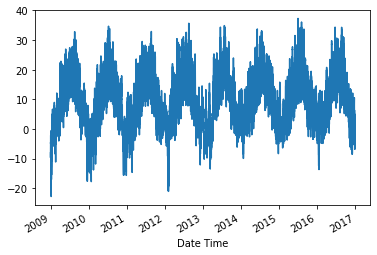

In [8]:
df1.plot()

### Time-Series Window Generation

In [9]:


def create_dataset(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [10]:
window_size = 5
X, y = create_dataset(df1, window_size)
X.shape, y.shape

((70086, 5, 1), (70086,))

### Data train-test Split

In [11]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

### Modelling x Callbacks

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [14]:
cp1 = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [15]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=12, callbacks=[cp1])

Epoch 1/12
1875/1875 [==============================] - ETA: 0s - loss: 96.9206 - root_mean_squared_error: 9.8448

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 12s 5ms/step - loss: 96.9206 - root_mean_squared_error: 9.8448 - val_loss: 7.7739 - val_root_mean_squared_error: 2.7882
Epoch 2/12
1869/1875 [============================>.] - ETA: 0s - loss: 12.2745 - root_mean_squared_error: 3.5035

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 12.2448 - root_mean_squared_error: 3.4993 - val_loss: 0.9448 - val_root_mean_squared_error: 0.9720
Epoch 3/12
1864/1875 [============================>.] - ETA: 0s - loss: 2.3387 - root_mean_squared_error: 1.5293

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 2.3328 - root_mean_squared_error: 1.5274 - val_loss: 0.5794 - val_root_mean_squared_error: 0.7612
Epoch 4/12
1875/1875 [==============================] - ETA: 0s - loss: 1.0310 - root_mean_squared_error: 1.0154

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 1.0310 - root_mean_squared_error: 1.0154 - val_loss: 0.5157 - val_root_mean_squared_error: 0.7182
Epoch 5/12
1866/1875 [============================>.] - ETA: 0s - loss: 0.7630 - root_mean_squared_error: 0.8735

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.7630 - root_mean_squared_error: 0.8735 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7089
Epoch 6/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6904 - root_mean_squared_error: 0.8309 - val_loss: 0.5431 - val_root_mean_squared_error: 0.7370
Epoch 7/12
1870/1875 [============================>.] - ETA: 0s - loss: 0.6661 - root_mean_squared_error: 0.8162

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6664 - root_mean_squared_error: 0.8163 - val_loss: 0.4952 - val_root_mean_squared_error: 0.7037
Epoch 8/12
1874/1875 [============================>.] - ETA: 0s - loss: 0.6550 - root_mean_squared_error: 0.8093

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6550 - root_mean_squared_error: 0.8093 - val_loss: 0.4888 - val_root_mean_squared_error: 0.6992
Epoch 9/12
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6496 - root_mean_squared_error: 0.8060 - val_loss: 0.4909 - val_root_mean_squared_error: 0.7006
Epoch 10/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6462 - root_mean_squared_error: 0.8039 - val_loss: 0.5000 - val_root_mean_squared_error: 0.7071
Epoch 11/12
1869/1875 [============================>.] - ETA: 0s - loss: 0.6429 - root_mean_squared_error: 0.8018

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6434 - root_mean_squared_error: 0.8021 - val_loss: 0.4830 - val_root_mean_squared_error: 0.6950
Epoch 12/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6409 - root_mean_squared_error: 0.8006 - val_loss: 0.4838 - val_root_mean_squared_error: 0.6955


### Predictions x Results Viz

In [16]:
from tensorflow.keras.models import load_model
model = load_model('model')

In [17]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,-9.957811,-9.67
1,-9.741530,-9.17
2,-8.840203,-8.10
3,-7.372804,-7.66
4,-7.201422,-7.04
...,...,...
59995,6.082879,6.07
59996,7.174989,9.88
59997,12.125348,13.53
59998,15.739516,15.43


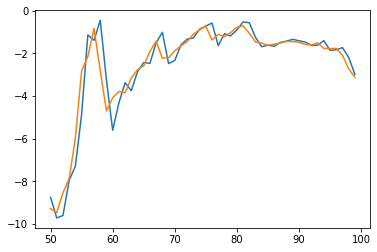

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [19]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,15.523746,14.02
1,13.245414,13.67
2,12.967385,12.27
3,11.410678,11.19
4,10.355401,10.85
...,...,...
4995,17.438112,18.27
4996,17.329201,17.85
4997,17.202988,16.65
4998,15.849868,15.85


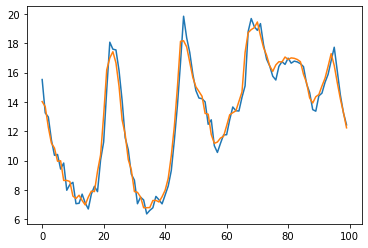

In [20]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [21]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,14.317657,13.99
1,13.151199,13.46
2,12.813556,12.93
3,12.440071,12.43
4,12.000203,12.17
...,...,...
5081,-1.141928,-0.98
5082,-1.407380,-1.40
5083,-1.605908,-2.75
5084,-3.087414,-2.89


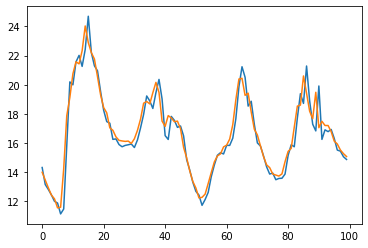

In [22]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])